# 16장 트라이
트라이는 검색 트리의 일종으로 일반적으로 키가 문자열인, 동적 배열 또는 연관 배열을 저장하는 데 사용되지 정렬된 트리 자료구조다.
트라이는 실무에 매우 유용하게 쓰이는 자료구조로서, 특히 자연어 처리 분야에서 문자열 탐색을 위한 자료구조로 널리 쓰인다.

트라이는 각각의 문자 단위로 색인을 구축한 것과 유사하며 자연어 처리 분야에서는 형태소 분석기에서 분석 패턴을 트라이로 만들어두고 자연어 문장에 대해 패턴을 찾아 처리하는 등으로 활용하고 있다.

## 56 트라이 구현

`트라이의 insert, search, startswith 메소드를 구현하라.`

Trie trie = new Trie();

trie.insert("apple");<br>
trie.search("apple");   // returns true<br>
trie.search("app");   // returns false<br>
trie.startsWith("apple");   // returns true<br>
trie.insert("app");<br>
trie.search("app");   // returns true<br>

## 풀이1 딕셔너리를 이용해 간결한 트라이 구현

```
class TrieNode:
    def __init__(self):
        self.word = False
        self.children = collections.defaultdict(TrieNode) 
```
- 트라이를 저장할 노드는 다음과 같이 별도의 클래스로 선언


    class Trie:
      def __init__(self):
        self.root = TrieNode()

    # 단어 삽입
    def insert(self, word: str) -> None:
        node = self.root
        for char in word:
            node = node.children[char]
        node.word = True

- 삽입 시 문자 단위의 다진 트리형태가 된다.

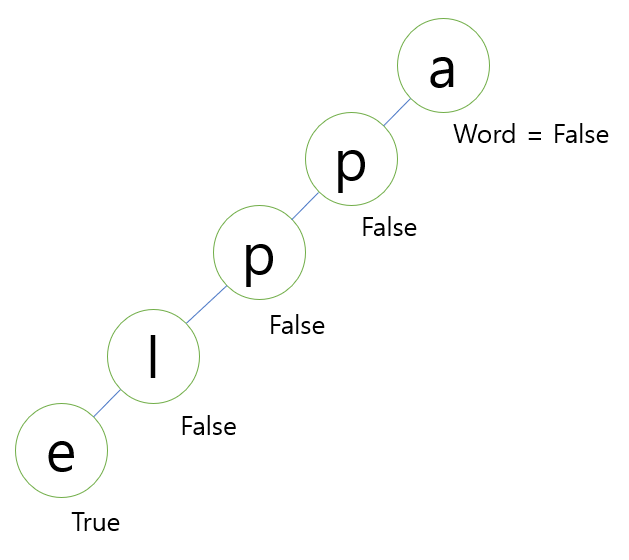


    # 단어 존재 여부 판별
    def search(self, word: str) -> bool:
        node = self.root
        for char in word:
            if char not in node.children:
                return False
            node = node.children[char]

        return node.word

- 문자열에서 문자를 하나씩 for 반복문으로 순회하면서 자식 노드로 계속 타고 내려가 마지막에 node.word 여부를 리턴한다.


    # 문자열로 시작 단어 존재 여부 판별
    def startsWith(self, prefix: str) -> bool:
        node = self.root
        for char in prefix:
            if char not in node.children:
                return False
            node = node.children[char]

        return True

- search()와 거의 동일하나 차이점은 node.word를 확인하지 않고, 자식 노드가 존재하는지 여부만 판별한다는 점이다.

In [17]:
import collections


# 트라이의 노드
class TrieNode:
    def __init__(self):
        self.word = False
        self.children = collections.defaultdict(TrieNode) 

class Trie:
    def __init__(self):
        self.root = TrieNode()

    # 단어 삽입4
    def insert(self, word: str) -> None:
        node = self.root
        for char in word:
            node = node.children[char]
        node.word = True

    # 단어 존재 여부 판별
    def search(self, word: str) -> bool:
        node = self.root
        for char in word:
            if char not in node.children:
                return False
            node = node.children[char]

        return node.word

    # 문자열로 시작 단어 존재 여부 판별
    def startsWith(self, prefix: str) -> bool:
        node = self.root
        for char in prefix:
            if char not in node.children:
                return False
            node = node.children[char]

        return True

if __name__ == '__main__':
    t = Trie()
    t.insert('apple')
    print(t.search('apple'))
    print(t.search('app'))
    print(t.startsWith('app'))
    t.insert('app')
    print(t.search('app'))

True
False
True
True


## 57 팰린드롬 페어

`단어 리스트에서 words[i] + words[j]가 팰린드롬이 되는 모든 인덱스 조함 (i, j)를구하라.`

예제 1<br>
- 입력<br>
["abcd","dcba","lls","s","sssll"]<br>

- 출력<br>
[[0,1],[1,0],[3,2],[2,4]]

예제 2<br>

- 입력<br>
["bat","tab","cat"]
- 출력<br>
[[0.,1],[1,0]]

## 풀이1 팰린드롬을 브루트 포스로 계산 

- 브루트 포스 <br>
고지식한 패턴검색으로 본문의 처음부터 끝까지 차례대로 순회하면서 패턴 내의 문자들을 일일이 비교하는 방식


In [27]:
from typing import List


class Solution:
    def palindromePairs(self, words: List[str]) -> List[List[int]]:
        def is_palindrome(word):
            return word == word[::-1]

        output = []
        for i, word1 in enumerate(words):
            for j, word2 in enumerate(words):
                if i == j:             
                    continue
                if is_palindrome(word1 + word2):
                    output.append([i, j])
                    print("i:",i)
                    print("j:",j)
        return output

if __name__ == '__main__':                                                                       
    s = Solution()
    print(s.palindromePairs(["abcd","dcba","lls","s","sssll"]))

i: 0
j: 1
i: 1
j: 0
i: 2
j: 4
i: 3
j: 2
[[0, 1], [1, 0], [2, 4], [3, 2]]


## 풀이2 트라이 구현


```
# 트라이 저장할 노드
class TrieNode:
    def __init__(self):
        self.children = collections.defaultdict(TrieNode)
        self.word_id = -1
        self.palindrome_word_ids = []
```

- palindrome_word_ids느 리스트이며 복수형이다.

```
class Trie:
    def __init__(self):
        self.root = TrieNode()

    @staticmethod # 정적메소드로 인스턴스메소드와 달리 self라는 인자를 가지고있지 않다
    def is_palindrome(word: str) -> bool:
        return word[::] == word[::-1]
```

- 파이썬 자료형의 인스턴스 메서드와 정적 메서드 차이<br>
a = {1, 2, 3, 4}<br>
a.update({5})    # 인스턴스 메서드<br>
a<br>
{1, 2, 3, 4, 5}<br>
set.union({1, 2, 3, 4}, {5})    # 정적(클래스) 메서드<br>
{1, 2, 3, 4, 5}

```
    # 단어 삽입
    def insert(self, index, word) -> None:
        node = self.root
        for i, char in enumerate(reversed(word)):
            if self.is_palindrome(word[0:len(word) - i]): 
                node.palindrome_word_ids.append(index)
            node = node.children[char]
        node.word_id = index
```

- 단어를 뒤집고 문자단위로 내려가며 트라이 구성 
- 그 후 각각의 단어가 끝나는 지점에 단어인덱스를 word_id로 부여

        # 판별 로직 1 : 끝까지 탐색했을 때 word_id가 있는경우
        if node.word_id >= 0 and node.word_id != index:
            result.append([index, node.word_id])

- 입력값을 순서대로 탐색
- 끝나는 지점의 word_id 값이 -1이 아니라면 현재 인덱스와 해당 word_id는 팰린드롬으로 판단할 수 있다.

        # 판별 로직 2 : 끝까지 탐색했을 때 palindrome_word_ids가 있는 경우 
        for palindrome_word_id in node.palindrome_word_ids:
            result.append([index, palindrome_word_id])

- 트라이 삽입 중 남아 있는 단어가 팰린드롬이라면 미리 팰린드롬 여부를 판단하게 세팅한 것이다.

            # 판별 로직 3 : 탐색 중간에 word_id가 있고 나머지 문자가 팰린드롬인 경우
            if node.word_id >= 0:
                if self.is_palindrome(word):
                    result.append([index, node.word_id])
            if not word[0] in node.children:
                return result
            node = node.children[word[0]]
            word = word[1:]

- 판별 로직은 입력값을 문자 단위로 확인해 나가다가 해당 노드의 word_id가 -1이 아닐 때, 나머지 문자가 팰린드롬이라면 팰린드롬으로 판별하는 경우다.

예 : dcbc + d


마지막으로 앞서 브루트 포스가 타임아웃인 데 반해 트라이 풀이는 시간 내에 잘 실행이 된다

In [21]:
import collections
from typing import List


# 트라이 저장할 노드
class TrieNode:
    def __init__(self):
        self.children = collections.defaultdict(TrieNode)
        self.word_id = -1
        self.palindrome_word_ids = []


class Trie:
    def __init__(self):
        self.root = TrieNode()

    @staticmethod # 정적메소드로 인스턴스메소드와 달리 self라는 인자를 가지고있지 않다
    def is_palindrome(word: str) -> bool:
        return word[::] == word[::-1]

    # 단어 삽입
    def insert(self, index, word) -> None:
        node = self.root
        for i, char in enumerate(reversed(word)):
            if self.is_palindrome(word[0:len(word) - i]): 
                node.palindrome_word_ids.append(index)
            node = node.children[char]
        node.word_id = index

    def search(self, index, word) -> List[List[int]]:
        result = []
        node = self.root

        while word:
            # 판별 로직 3 : 탐색 중간에 word_id가 있고 나머지 문자가 팰린드롬인 경우
            if node.word_id >= 0:
                if self.is_palindrome(word):
                    result.append([index, node.word_id])
            if not word[0] in node.children:
                return result
            node = node.children[word[0]]
            word = word[1:]

        # 판별 로직 1 : 끝까지 탐색했을 때 word_id가 있는경우
        if node.word_id >= 0 and node.word_id != index:
            result.append([index, node.word_id])

        # 판별 로직 2 : 끝까지 탐색했을 때 palindrome_word_ids가 있는 경우 
        for palindrome_word_id in node.palindrome_word_ids:
            result.append([index, palindrome_word_id])

        return result


class Solution:
    def palindromePairs(self, words: List[str]) -> List[List[int]]:
        trie = Trie()

        for i, word in enumerate(words):
            trie.insert(i, word)

        results = []
        for i, word in enumerate(words):
            results.extend(trie.search(i, word))

        return results


if __name__ == '__main__':
    s = Solution()
    print(s.palindromePairs(["bat","tab","cat"]))

[[0, 1], [1, 0]]
